In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('paris_temperature.csv')


In [5]:
df['precipcover'].value_counts()

precipcover
0.00     103
4.17      52
8.33      39
16.67     34
12.50     32
29.17     20
25.00     19
20.83     14
33.33     14
37.50     12
41.67     12
45.83      7
50.00      7
54.17      6
58.33      3
70.83      3
62.50      3
75.00      1
66.67      1
Name: count, dtype: int64

In [4]:
df_last11 = df.iloc[:, -11:]
df_last11.columns

Index(['solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations'],
      dtype='object')

### Solar radiation


- Definition: Energy emitted by the sun through electromagnetic waves
- Data type: numerical 
- Unit: Watts per metre $(W/m^2)$

In [15]:
df_last11['solarradiation'].describe()

count    382.000000
mean      49.813874
std       37.130885
min        0.000000
25%       16.825000
50%       43.500000
75%       76.325000
max      169.800000
Name: solarradiation, dtype: float64

### Solar energy 


- Definition: The solar radiation that **reaches** the Earth. As a result, solar energy is often much lower than solar radiation 
- Data type: numerical
- Unit: $W/m^2$

In [20]:
df_last11['solarenergy'].describe().iloc[1:]

mean     4.296335
std      3.214728
min      0.000000
25%      1.400000
50%      3.800000
75%      6.500000
max     14.700000
Name: solarenergy, dtype: float64

### UV index  
- Definition: UV index or ultraviolet index is a measurement of the strength sunburn-producing ultraviolet radiation
- Values range: 0 - 11+ where: 
    - 0 - 2: low risk of ham
    - 3 - 5: moderate risk of ham
    - 6 - 7: high risk of ham
    - 8 - 10: very high risk of ham
    - 11+: extreme risk of ham

In [22]:
df_last11['uvindex'].describe().iloc[1:]
df_last11['uvindex'].value_counts()

uvindex
1    111
2     56
3     52
4     34
0     34
6     33
7     27
5     23
8     12
Name: count, dtype: int64

- In our dataset, uv index only range from 0 to 8

### Severe risk
- Definition: No idea
- Data type: numerical, integer
- Values: 10, 30, 60, 75

In [28]:
df_last11['severerisk'].describe().iloc[1:]
df_last11['severerisk'].value_counts()

severerisk
10    373
30      6
60      2
75      1
Name: count, dtype: int64

### Sunrise
- Definition: The specific time when the sun rises
- Data type: Date. Format: YYYY-MM-DD HH:MM:SS 

In [34]:
df_last11['sunrise'].head()

0    2023-10-01T07:49:34
1    2023-10-02T07:51:01
2    2023-10-03T07:52:29
3    2023-10-04T07:53:57
4    2023-10-05T07:55:25
Name: sunrise, dtype: object

### Sunset
- Definition: The specific time of the sunset
- Data type: - Data type: Date. Format: YYYY-MM-DD HH:MM:SS 

In [38]:
df_last11['sunset'].head()

0    2023-10-01T19:30:27
1    2023-10-02T19:28:21
2    2023-10-03T19:26:16
3    2023-10-04T19:24:10
4    2023-10-05T19:22:06
Name: sunset, dtype: object

### Moon phase
- Description: Moon phases are different shapes of the moon as we see in different days in a month.  
There are  a total of 8 moon phases: New moon -> Waxing Crescent -> First quarter -> Waxing Gibbous -> Full moon -> Waning Gibbous -> Third Quarter -> Waning Crescent -> New moon
- Values: 0 to 1, indicate the sunlit portion to the moon 
    - 0: at new moon
    - 0.5: at full moon


In [41]:
df_last11['moonphase'].describe().iloc[1:]

mean    0.481990
std     0.289633
min     0.000000
25%     0.242500
50%     0.480000
75%     0.750000
max     0.980000
Name: moonphase, dtype: float64

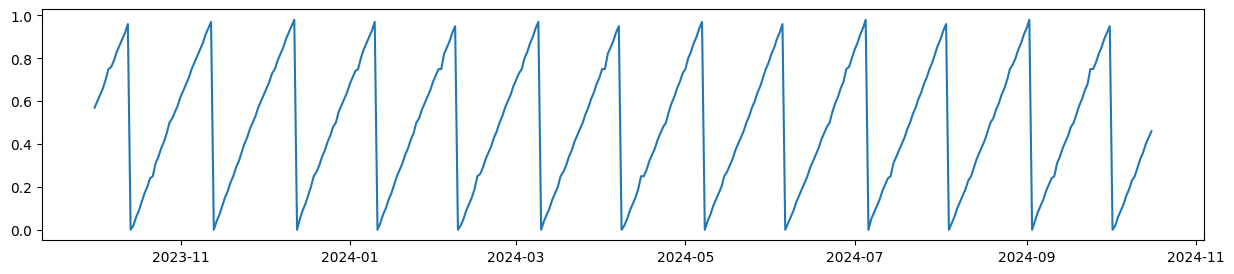

In [52]:
plt.figure(figsize=(15,3))
plt.plot(pd.to_datetime(df['datetime']), df['moonphase'])

### Conditions
- Description: The weather condition in that day
- Data type: categorical
- Values: Rain, partially cloudy, overcast, clear, snow, freezing drizzle/freezing rain
- Each day can have a combination of conditions

In [54]:
df['conditions'].value_counts()

conditions
Rain, Partially cloudy                                          136
Rain, Overcast                                                  133
Partially cloudy                                                 84
Overcast                                                         20
Clear                                                             4
Snow, Rain, Overcast                                              3
Snow, Rain, Partially cloudy                                      1
Snow, Rain, Freezing Drizzle/Freezing Rain, Partially cloudy      1
Name: count, dtype: int64

### Description
- Description: The detail description of weather condition
- Data type: String

In [60]:
df['description'].head()

0    Partly cloudy throughout the day with morning ...
1                    Partly cloudy throughout the day.
2    Partly cloudy throughout the day with rain in ...
3    Partly cloudy throughout the day with morning ...
4    Partly cloudy throughout the day with morning ...
Name: description, dtype: object

### Icon
- Description: The most suitable icon to describe weather for that day 
- Data type: Categorical
- Values: rain, partly-cloudy-day, cloudy, snow, clear-day

In [62]:
df['icon'].value_counts()

icon
rain                 269
partly-cloudy-day     84
cloudy                20
snow                   5
clear-day              4
Name: count, dtype: int64

### Stations
- Description: some kind of identifications of the stations that collects that data
- Datatype: List of number and string
    - Numbers often start with 071 and end with 99999
    - Strings can consist of 4-letter string or 1 letter plus 4 numbers (e.g., C1292)

In [68]:
df['stations'].value_counts()

stations
07149099999,07156099999,07146099999,07157099999,C1292,07147099999,07150099999                                           247
07149099999,07156099999,07146099999,07145099999,07157099999,C1292,07147099999,07150099999                                36
07149099999,07156099999,07146099999,LFPV,07157099999,C1292,07147099999,LFPO,07150099999,LFPB                             18
07149099999,07156099999,07146099999,07157099999,C1292,07147099999,07150099999,D3623                                      12
LFPV,C1292,LFPO,LFPB                                                                                                     10
07149099999,07156099999,07146099999,07153099999,07157099999,C1292,07147099999,07150099999                                 6
07149099999,07156099999,07146099999,LFPV,07145099999,07153099999,07157099999,C1292,07147099999,LFPO,07150099999,LFPB      6
07149099999,07156099999,07146099999,07157099999,07147099999,C1292,07150099999,D3623                                       5